# CHECK THE RANDOM FOREST REGRESSION EFFICIENCY

In [1]:
# Import the basic libraries
import os
import numpy as np
import csv
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
import shutil
import time
from typing import List, Callable, Iterable

# Import PYCMA-ES (from Nikolaus Hansen)
import cma

# Import the Modular CMA-ES library (Jacob de Nobel, Diederick Vermetten)
from modcma import c_maes
from modcma import AskTellCMAES

# IOH
import ioh

# Specific Scikit Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# SKOPTS library to load objects from Scikit-Learn
from skops.card import Card
from skops.card import parse_modelcard
from skops.io import dump, load

In [8]:
##### -----------------------------------------------------------
##### ------------------CONSTANTS--------------------------------
##### -----------------------------------------------------------

# THIS IS TO SET THE LAMBDA TO ADJUST THE RESTRICTION ON THE PROBLEM
LAMDA:float = 3.981071705534969283e+02
#LAMDA:float = 9.00e+02
INTRUSION_PRIME:float = 60.00

ff = lambda sea, intr_: sea - LAMDA*np.abs(INTRUSION_PRIME-intr_) 
#ff = lambda sea, intr_: sea - LAMDA*np.maximum(intr_-INTRUSION_PRIME,0) 
#Load a list with the models
models_dual:List[GridSearchCV] = [load(f"/home/ivanolar/Documents/RF_reg_dual_{dd}D.skops" , trusted=True) for dd in [1,3,5]]

In [9]:
thickness_arr = np.linspace(-5,5,10000).reshape((-1,1))

In [10]:
FILNAMES:list = [
    "x_sobol.csv",
    "x_morris.csv",
    "x_lhs.csv",
    "y_sobol.csv",
    "y_morris.csv",
    "y_lhs.csv"
]

slices:dict = {1:[4],
               3:[0,1,4],
               5:[0,1,2,3,4]}



[110.37953384 110.37953384 110.15480876 ...  26.22676767  26.22676767
  26.22676767] [24274.36055069 24274.36055069 23792.01967789 ...  5628.59197624
  5628.59197624  5628.59197624]
[109.32195664 109.32195664 109.29061023 ...  30.78845207  30.78845207
  30.76266582] [22748.07377858 22748.07377858 22777.83598041 ...  6128.99612231
  6128.99612231  6125.44748302]
[109.05070366 109.05070366 109.05890366 ...  30.56811646  30.56811646
  30.54468631] [22520.81885011 22520.81885011 22507.62562933 ...  6102.98618361
  6102.98618361  6099.01244857]


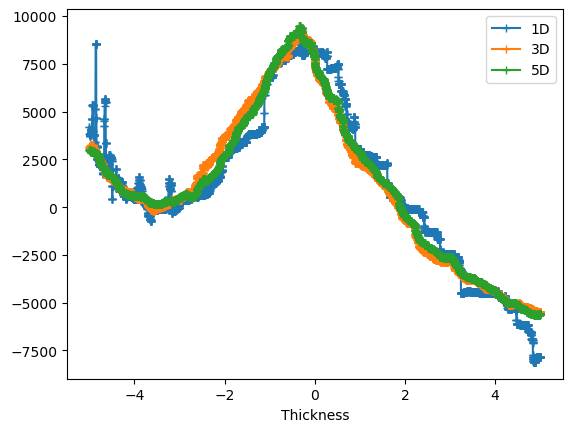

In [11]:
for idx, dd in enumerate([1,3,5]):
    curmodel:GridSearchCV = models_dual[idx]
    
    if dd == 1:
        dual_arr = curmodel.predict(thickness_arr)
    
    elif dd==3:
        arr = np.hstack((np.zeros((thickness_arr.shape[0],2)), thickness_arr))
        dual_arr = curmodel.predict(arr)
    
    elif dd==5:
        arr = np.hstack((-0*np.ones((thickness_arr.shape[0],2)),np.zeros((thickness_arr.shape[0],2)), thickness_arr))
        dual_arr = curmodel.predict(arr)
    
    print(dual_arr[:,0],dual_arr[:,1])

    plt.plot(thickness_arr, ff(dual_arr[:,1],dual_arr[:,0]),marker='+')
    plt.legend(['1D','3D','5D'])
    plt.xlabel("Thickness")



 



In [12]:
xx, yy = np.meshgrid(thickness_arr,thickness_arr)


1. Check the regression results ()
2. Repeat the optimization with the new target (CMA-es). 
2.a. Fitted on all the parameters and just "observable" parameters
3. Run the same type of setting for Tobias Lehrer's dataset (** If the Crash-Box works, then it's not interesting)
4. 